In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

import numpy as np


mdf = pd.read_excel('https://query.data.world/s/l6is4f6umpvgsqkjuwtkfdvht2vywt')

pivoted_df=mdf.pivot_table(index='Age Range', columns=['Gender','Year'], values='Never Married')
pivoted_df[('Men','Pct_Increase')]=pivoted_df.loc[:,('Men',2016)] / pivoted_df.loc[:,('Men',2006)]-1
pivoted_df[('Women','Pct_Increase')]=pivoted_df.loc[:,('Women',2016)] / pivoted_df.loc[:,('Women',2006)]-1
pivoted_df[('Men','Change')]=pivoted_df.loc[:,('Men',2016)] - pivoted_df.loc[:,('Men',2006)]
pivoted_df[('Women','Change')]=pivoted_df.loc[:,('Women',2016)] - pivoted_df.loc[:,('Women',2006)]


# Makeover Monday - 6/7/2021
In this Makeover Monday exercise, the data represents the percentage of men and women across different age groups who have never married in 2006 and 2016.  

For this visualization, I selected a double grouped bar chart to highlight the variations between the genders and the change over time.  

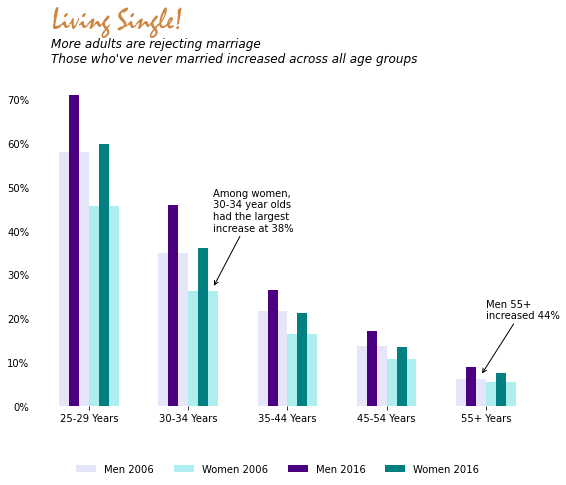

This example uses the following techniques:
- Customizing colors
- Modifying the axes
- Annotating plots

In [ ]:
fig1,ax1=plt.subplots(figsize=(9,6))

# creates evenly spaced values for the x ticks
x = np.linspace(0,80,len(pivoted_df))

# creates variables for the bar widths
width_2006 = 6
width_2016 = 2

# creates grouped bar charts for the 2006 data
ax1.bar(x - width_2006/2, pivoted_df.loc[:,('Men',2006)], # bar appears to the left of the x-coordinate of the bar
        width_2006, color='lavender', label='Men 2006')

ax1.bar(x + width_2006/2, pivoted_df.loc[:,('Women',2006)], # bar appears to the right of the x-coordinate of the bar
        width_2006, color='paleturquoise', label='Women 2006')

#creates grouped bad charts for the 2016 data
ax1.bar(x - width_2006/2, pivoted_df.loc[:,('Men',2016)], 
        width_2016, color='indigo',label='Men 2016')

ax1.bar(x + width_2006/2, pivoted_df.loc[:,('Women',2016)], 
        width_2016, color='teal',label='Women 2016')

# places the logo below the chart
ax1.legend(bbox_to_anchor=(0.9,-0.15),ncol=4,frameon=False)

# sets the x ticks and updates the labels
ax1.set_xticks(x)
ax1.set_xticklabels(pivoted_df.index + ' Years')

# removes all spines from axis
for spine in ax1.spines.keys():
    ax1.spines[spine].set_visible(False)

# removes tick marks from left spine    
ax1.tick_params(left=False)

# formats yaxis as percent
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))

# adds figure title
fig1.suptitle('Living Single!',x=0.25, y=1.05
              ,size='30', color='peru',name='mistral') # changes font style using name parameter

# adds subtitle
ax1.annotate('More adults are rejecting marriage \nThose who'"'"'ve never married increased across all age groups',
             style='italic', xy=(.2,.89), xytext=(.09,.87), size = '12',
             xycoords='figure fraction')

# adds chart annotations based on data coordinates
ax1.annotate('Among women, \n30-34 year olds \nhad the largest \nincrease at 38%', xy=(25,.27),xytext=(25,.4),
            arrowprops=dict(arrowstyle='->, head_length=0.4, head_width=0.2'))

ax1.annotate('Men 55+ \nincreased 44%', xy=(79,.07),xytext=(80,.2),
            arrowprops=dict(arrowstyle='->, head_length=0.4, head_width=0.2'))
